# <center>NLP: Topic Modeling for Riyadh Newspaper Articles</center>



**DATA**: We are planning to use our previously **scraped** data from the Riyadh Newspaper website **in Arabic**, ~3GB, plus some additional data (MetaData) that could add a meaningful sense to our project, see [Riyadh Newspaper website](http://www.alriyadh.com/1814297) to understand how we scraped the data.

**EXPECTED OUTPUT**: At the end of this project we expect to be done NLP **Topic Modeling** on Riyadh Newspaper articles, and all it's required preproccesing steps in addition to approperiate visualization.

**BONUS TASKS**: 
- Scraping ~3GB Data. 
- Using SQL Database for data storage. 
- As a challenge, we used data written in Arabic.

# 1. Data

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import unicodedata

import nltk # pip install nltk
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem.isri import ISRIStemmer

from sklearn.feature_extraction.text import TfidfVectorizer


### Reading From Database

In [2]:
# server = 't5.database.windows.net'
# database = 'T5'
# username = 't5'
# password = 'My404Data'

# # dfs2.columns=dfs2.columns.str.strip()

# cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
# cursor = cnxn.cursor()

In [3]:
# df = pd.read_sql("select * from articles",cnxn)
# df
# df.to_csv("metadata.csv", encoding='utf-8-sig')

In [4]:
# df2= pd.read_sql("select * from texts",cnxn)
# df2
# df2.to_csv("all_texts.csv",encoding='utf-8-sig')

### Reading CSVs Files

### Texts

In [6]:
df_texts = pd.read_csv('all_texts.csv')

In [9]:
df_texts.head(3)

,Unnamed: 0,T_ID,T_AID,T_Text
0,0,87160,174309,\nعلى الرغم من التحذيرات الشديدة والمتكررة الت...
1,1,87164,174317,\nأدى محافظ ضمد عبدالله خالد البراق عقب صلاة ع...
2,2,87165,174319,\nرفع رئيس مجلس إدارة الهيئة العامة للولاية عل...


In [10]:
df_texts.shape

(283762, 4)

### Metadata

In [5]:
df_metadata = pd.read_csv('metadata.csv')

In [7]:
df_metadata.head(3)

,Unnamed: 0,A_ID,A_Link,A_LinkNum,A_Timestr,A_Cat,A_Auth,A_Title1,A_Title2,A_Paragraphs,A_Words,A_Characters
0,0,1,http://www.alriyadh.com/1814297,1814297,&nbsp; \n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\...,المحليات,"الرياض - ""الرياض""",إلى ما بعد اجتماع مجموعة أوبك بلس,السعودية تؤجل الإعلان عن أسعار الخام لشهر مايو,8,339,1962
1,1,2,http://www.alriyadh.com/1814297,1814297,&nbsp; \n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\...,المحليات,"الرياض - ""الرياض""",إلى ما بعد اجتماع مجموعة أوبك بلس,السعودية تؤجل الإعلان عن أسعار الخام لشهر مايو,8,339,1962
2,2,3,http://www.alriyadh.com/1814296,1814296,&nbsp; \n\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\...,المحليات,وادي الدواسر - سعود آل مسيب,NaN,تعليم وادي الدواسر يبدأ المرحلة الثانية من خطة...,3,183,1162


In [8]:
df_metadata.shape

(567524, 12)

### Article Text Example

In [11]:
df_texts['T_Text'][0]

'\nعلى الرغم من التحذيرات الشديدة والمتكررة التي يوجهها الدفاع المدني للمواطنين قبل وبعد هطول الأمطار لتوخي الحذر والابتعاد عن أماكن تجمعات السيول وبطون الأودية ورغم ما تتناقله وسائل التواصل الاجتماعي من مقاطع مؤلمة ومفجعة لأشخاص جرفتهم السيول بمركباتهم ولقوا حتفهم بأبشع الصور وأسوأء المناظر، إلاّ أنه مازال هناك الكثير من المراهقين ومن فاقدي البصيرة المتهورين تستهويهم المغامرات المهلكة داخل بطون الأودية والأماكن التي غمرتها مياه الأمطار، غير مبالين بخطورة تلك الأفعال وشناعة تلك التصرفات العبثية، التي ربما يفقدون حياتهم بسببها في أدنى لحظة.\nوفي كل موسم من مواسم الأمطار تتجدد ظاهرة التهور والمغامرات في السيول وتتجدد معها معاناة رجال الدفاع المدني الذين مهما كان لديهم من إمكانات لن يستطيعوا تغطية جزء مساحته مئات الكيلومترات من براري المملكة الشاسعة التي تتنوع فيها التضاريس المعقدة.\nماذا بعد\nوتداولت شبكات التواصل الاجتماعي مقاطع فيديوهات لبعض المتهورين وهم يقتحمون الأودية مع سبق الإصرار، غير مبالين بتحذيرات الدفاع المدني وغير مبالين بالأشخاص الموجودين بتلك المواقع الذين حاولوا ثنيهم عن 

# 2. EDA

### Articles Lengths

In [ ]:
# calculate articles lengths
df_texts['Words_Number'] = df_texts['T_Text'].astype(str).apply(lambda x : len(x.split()))

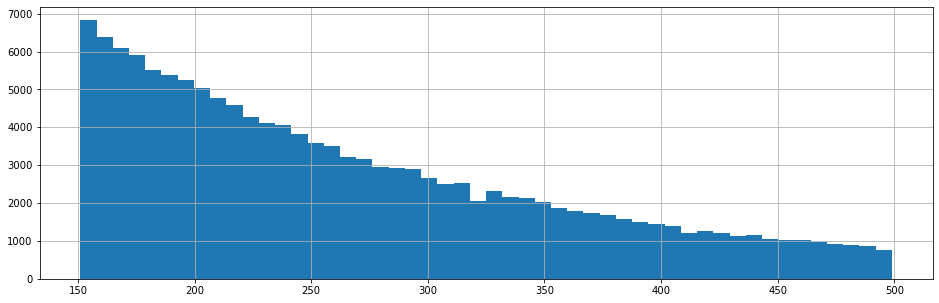

In [28]:
plt.figure(figsize=(16, 5))
plt.grid()
plt.hist(df_texts['Words_Number'], bins=50);
plt.show();

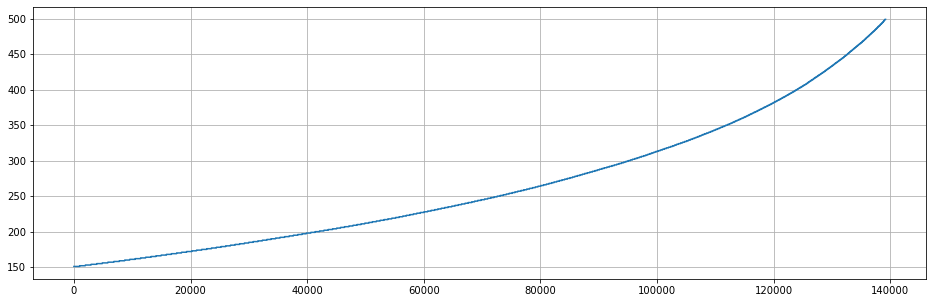

In [29]:
plt.figure(figsize=(16, 5))
plt.grid()
plt.plot(range(0, df_texts.shape[0]), df_texts.sort_values(['Words_Number'])['Words_Number']);
plt.show();

### Cleaning Text

In [43]:
# unwanted charachters (e.g. \n, \xa0, etc.)
df_texts['T_Text'] = df_texts['T_Text'].apply(lambda x:unicodedata.normalize("NFKD", str(x)).replace('\n', ''))

# Wrong Texts (i.e. very long/short texts)
df_texts = df_texts[((df_texts['Words_Number'] > 150) & (df_texts['Words_Number'] < 500))]
print(df_texts.shape)

(139176, 5)


### Merge Texts & Metadata

In [25]:
t_uni = df_texts['T_AID'].unique()
t_uni.sort()
t_uni

array([     2,      4,      6, ..., 567521, 567525, 567527], dtype=int64)

In [26]:
a_uni = df_metadata['A_LinkNum'].unique()
a_uni.sort()
a_uni

array([1500023, 1500024, 1500025, ..., 1814295, 1814296, 1814297],
      dtype=int64)

In [45]:
df = pd.merge(df_texts, df_metadata, how='left', left_on='T_AID', right_on='A_LinkNum')
print(f'Nan values {df.A_ID.isna().sum()/df_texts.shape[0]*100}%')
df.head()

Nan values 100.0%


,Unnamed: 0_x,T_ID,T_AID,T_Text,Words_Number,Unnamed: 0_y,A_ID,A_Link,A_LinkNum,A_Timestr,A_Cat,A_Auth,A_Title1,A_Title2,A_Paragraphs,A_Words,A_Characters
0,3,87168,174325,وجه صاحب السمو الملكي الأمير د. فيصل بن مشعل ...,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,87166,174321,استقبل صاحب السمو الملكي الأمير د. حسام بن سع...,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,87167,174323,استقبل صاحب السمو الملكي الأمير سعود بن نايف ...,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,87171,174331,نجح الفريق الطبي بمركز طب وجراحة القلب بمستشفى...,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,87172,174333,في إطار مشاركة جامعة الأميرة نورة بنت عبدالر...,328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Preprocessing

In [ ]:
text = df_texts['T_Text'][0]
text

### 3.2. Lower casing

In [ ]:
text = text.lower()
text

### 3.1. Tokenization

In [ ]:
text = ' '.join(word_tokenize(text))
# sent_tokenize(df_texts['T_Text'][0])
text

### 3.3. Stop words removal

In [ ]:
# Hint: we can try spaCy
sw_nltk = stopwords.words('arabic')

text = [word for word in text.split() if word.lower() not in sw_nltk]
# text = " ".join(text)
text

### 3.4. Stemming or Lemmatization

In [ ]:
st = ISRIStemmer()

for w in text:
    print(w, " : ", st.stem(w))
    new_text += st.stem(w)
text = new_text

# 4. Encoding (???, TFIDF or Bag of Word)

### 4.1. ???

### 4.2. TFIDF

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([text, text])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

### 4.3. Bag of Word

# 5. Topic Modeling

### 5.1. LDA

### 5.2. ???

# 6. Clustering